---------------------------
### Breast cancer diagnosis based on k-nearest neighbors
-----------------------

- Machine learning techniques commonly employed in breast lesion classification
- Improved accuracy in `mammogram-based` malignant mass detection
- `Challenge lies in distinguishing` between `benign` and `malignant` cases
- K-Nearest Neighbors classifier helps address cancer detection issue
- Provides high accuracy in disease classification

In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets  import load_breast_cancer

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

#### loading data

In [3]:
breast_cancer_data = load_breast_cancer()

In [4]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:


X, y          = breast_cancer_data.data, breast_cancer_data.target
feature_names = np.array(breast_cancer_data.feature_names)

In [148]:
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
features = pd.DataFrame(data    = breast_cancer_data.data, 
                        columns = breast_cancer_data.feature_names)

labels      = pd.DataFrame(data = breast_cancer_data.target)
label_names = breast_cancer_data.target_names

In [10]:
features.shape

(569, 30)

In [11]:
features.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
143,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,0.06235,...,14.48,21.82,97.17,643.8,0.1312,0.2548,0.2090,0.10120,0.3549,0.08118
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.1632,0.1622,0.07393,0.2781,0.08052
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,...,18.10,31.69,117.70,1030.0,0.1389,0.2057,0.2712,0.15300,0.2675,0.07873
51,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.1050,0.08586,0.2346,0.08025
49,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917


In [12]:
labels.value_counts()

1    357
0    212
dtype: int64

#### Missing value

In [153]:
#features.isnull().sum()

No missing values !!!

#### build ML model

- setup a KNN classifer, with default settings

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=.80, random_state=11)

In [18]:
print('Number of training samples : ', len(X_train))
print('Number of test     samples : ', len(X_test))

Number of training samples :  455
Number of test     samples :  114


In [19]:
knn_clf = KNeighborsClassifier()

In [20]:
knn_clf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [21]:
y_pred = knn_clf.predict(X_test)

#### metrics

In [22]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.9473684210526315


In [23]:
confusion_matrix(y_test, y_pred)

array([[33,  5],
       [ 1, 75]], dtype=int64)

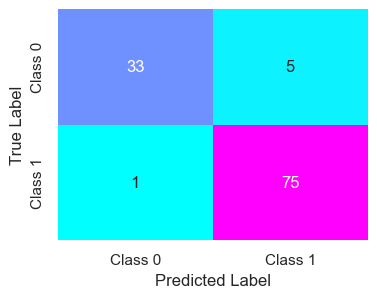

In [25]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="cool", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.94      0.99      0.96        76

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Need for scaling the dataset

In [127]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


data ranges from fractions to 4 leading digits. `Good candidate for scaling`

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train.values)

MinMaxScaler()

In [30]:
scaler.data_max_

array([2.811e+01, 3.928e+01, 1.885e+02, 2.499e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.256e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.313e+01, 4.716e+01, 2.293e+02, 3.432e+03,
       2.226e-01, 9.379e-01, 1.252e+00, 2.910e-01, 6.638e-01, 1.730e-01])

In [31]:
X_train.shape

(455, 30)

In [32]:
scaler.data_min_

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.203e-01, 5.024e-02, 1.115e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [33]:
scaler.data_range_

array([2.11290e+01, 2.95700e+01, 1.44710e+02, 2.35550e+03, 1.10770e-01,
       3.26020e-01, 4.26800e-01, 2.01200e-01, 1.83700e-01, 4.72000e-02,
       2.76150e+00, 4.52480e+00, 2.12230e+01, 5.18798e+02, 2.94170e-02,
       1.33148e-01, 3.96000e-01, 5.27900e-02, 7.10680e-02, 2.89452e-02,
       2.52000e+01, 3.51400e+01, 1.78890e+02, 3.24680e+03, 1.51430e-01,
       9.10610e-01, 1.25200e+00, 2.91000e-01, 5.07300e-01, 1.17960e-01])

In [36]:
X_train_scaled = scaler.transform(X_train.values)

In [38]:
X_train_scaled

array([[0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.27585622],
       [0.2522126 , 0.23030098, 0.24462719, ..., 0.2975945 , 0.20756949,
        0.17845032],
       [0.22002934, 0.66215759, 0.21477438, ..., 0.23487973, 0.26000394,
        0.14547304],
       ...,
       [0.55795352, 0.39634765, 0.54667957, ..., 0.70378007, 0.41671595,
        0.37012547],
       [0.39703725, 0.44132567, 0.38981411, ..., 0.50721649, 0.19534792,
        0.11224144],
       [0.21151025, 0.38079134, 0.20744938, ..., 0.21054983, 0.23595506,
        0.28374025]])

In [39]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled  = scaler.fit_transform(X_test.values)

In [40]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_scaled, y_train.values.ravel())

y_pred = knn_clf.predict(X_test_scaled)

In [41]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.956140350877193


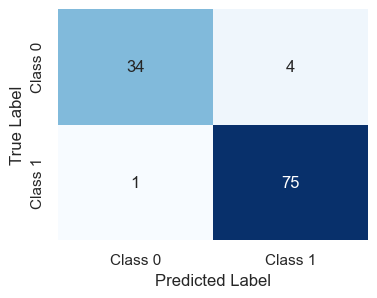

In [42]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       1.00      0.97      0.99        76

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



#### find optimal value of K

In [43]:
# Choose a range of 'k' values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

best_accuracy = 0
best_k        = None

# Loop over 'k' values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.values.ravel())
    
    y_pred   = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best 'k' value:", best_k)

Best 'k' value: 21


In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [137]:
# Choose a range of 'k' values
k_values = [1, 3, 5, 7, 9, 11]

best_accuracy = 0
best_k        = None

# Loop over 'k' values
for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train.values.ravel(), cv=5, scoring='accuracy')

    # Calculate the average accuracy across folds
    average_accuracy = scores.mean()
    
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_k = k

print("Best 'k' value:", best_k)
print("Average accuracy:", best_accuracy)


Best 'k' value: 5
Average accuracy: 0.9692307692307693


#### Final model build

In [138]:
knn_clf = KNeighborsClassifier(n_neighbors=7)

knn_clf.fit(X_train_scaled, y_train.values.ravel())

y_pred = knn_clf.predict(X_test_scaled)

In [139]:
print('Accuracy of the model : ', accuracy_score(y_test, y_pred))

Accuracy of the model :  0.9912280701754386


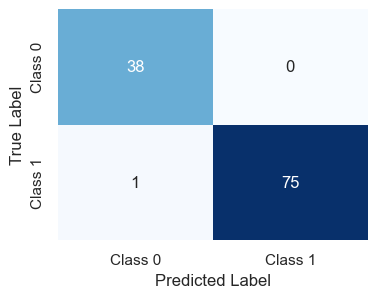

In [140]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
class_names = ["Class 0", "Class 1"]
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Saving/load the model

In [141]:
import pickle

In [142]:
# Save the trained model using pickle
model_filename = "knn_model_breast_cancer.pkl"

with open(model_filename, 'wb') as model_file:
    pickle.dump(knn_clf, model_file)

loading the model

In [143]:
# Load the saved model using pickle
with open(model_filename, 'rb') as model_file:
    loaded_knn = pickle.load(model_file)

In [144]:
# Make predictions using the loaded model
y_pred = loaded_knn.predict(X_test_scaled)

# Calculate accuracy using the loaded model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using loaded model:", accuracy)

Accuracy using loaded model: 0.9912280701754386
